# Audio Analysis of Spotify Tracks and Artists in Python3
By: Vinay Chitepu

## Introduction

The goal of this project is to create a system of comparing two song together (or snippets from different songs)and retrieving a percentage rating of how similar they are in terms of sound and tone. It will also see if we can make any conclusions about the an artist and their work.

## Setup and Authorization

The following is all the setup and authorization needed to begin working on this project

#### Importing Libraries Needed

In [1]:
import json                        # Used to handle and organiza json dump
import numpy                       # Handling arrays
import spotipy                     # Spotify API for Python3
import pandas as pd                # Used for data analysis and manipulating DF's
import sklearn as sk               # ML library
import seaborn as sns              # Preferred DataViz Library
import spotipy.util as util        # Token creator for spotify developer authorization
import matplotlib.pyplot as plt    # Used in coherence with Seaborn for DataViz   

#### Spotify API Authorization
Created token using client_id and client_secret for ClientCredentials Authorization and creates an accessor object to use the API

In [2]:
# My client_id and client_secret
cid = 'a283931dfa894cec8ecdea9f547695d2'
csecret = 'ff6ee8b9059f40d3a02731d969048545'

# Token creation
token = util.oauth2.SpotifyClientCredentials(client_id=cid, client_secret=csecret)
cache_token = token.get_access_token()

# Creating object using token
sp = spotipy.Spotify(cache_token)

#### Setup for Seaborn

Setup for seaborn library with my personal style preferences

In [3]:
# My personal style preferences
sns.set(style = 'darkgrid', color_codes = True)
sns.set(rc={'figure.figsize':(14,8)})
# This is used as a hack in Jupyter Notebook to make seabron plots bigger. Call before making a plot.
def setplt(x=12,y=7):
    f, ax = plt.subplots(figsize=(x, y))
    sns.despine(f, left=True, bottom=True)

#### Setup for JSON outputs

Function for pretty printing JSON outputs

In [4]:
def printj(st):
    print(json.dumps(st, sort_keys = True, indent = 4))

## Compare 2 Tracks

The following program will do a brief comparison of two song of our choosing using the spotify API audio_feautures functionality

### Search Tracks
The following will allow a user to search for two songs that they want to compare.

In [5]:
# This function lets a user search for an select a song
def song_select():
    t_input = input("Enter the name of the song: ")
    tracks = sp.search(q = t_input, limit = 3, type = "track") # Change the limit parameter to widen search
    count = 0
    tid_search = []
    for x in tracks['tracks']['items']:
        count+=1
        tid_search.append(x['id'])
        print("\n\n" + str(count) + ".   Name: " + x['name'])
        print("\t Artist: " + x['artists'][0]['name'])
        print("\t Album: " + x['album']['name'])

    print("\n\n")
    song_1 = input('Enter the number of the song: ')
    tid1 = tid_search[int(song_1) - 1]
    return tid1

In [7]:
tid1 = song_select()
tid2 = song_select()

Enter the name of the song: Same Drugs


1.   Name: Same Drugs
	 Artist: Chance the Rapper
	 Album: Coloring Book


2.   Name: Same Drugs
	 Artist: MisterWives
	 Album: Same Drugs


3.   Name: Same Drugs
	 Artist: Jordan Moore
	 Album: Same Drugs



Enter the number of the song: 1
Enter the name of the song: Blessings


1.   Name: Blessings
	 Artist: Big Sean
	 Album: Dark Sky Paradise


2.   Name: Blessings
	 Artist: Chance the Rapper
	 Album: Coloring Book


3.   Name: Blessings
	 Artist: Chance the Rapper
	 Album: Coloring Book



Enter the number of the song: 2


### Audio Features Comparison

Compares the two selected songs

In [8]:
two_features = sp.audio_features(tid1)
two_features.append(sp.audio_features(tid2))
song1 = sp.track(tid1)
song2 = sp.track(tid2)
song1
print(song1['name'])
printj(two_features[0])
print('\n')
print(song2['name'])
printj(two_features[1][0]) #Index 0 needed for some reason

Same Drugs
{
    "acousticness": 0.947,
    "analysis_url": "https://api.spotify.com/v1/audio-analysis/6m9qPYXmhge2QhBLfFKnVF",
    "danceability": 0.461,
    "duration_ms": 257775,
    "energy": 0.293,
    "id": "6m9qPYXmhge2QhBLfFKnVF",
    "instrumentalness": 9.95e-06,
    "key": 6,
    "liveness": 0.0936,
    "loudness": -9.52,
    "mode": 1,
    "speechiness": 0.0555,
    "tempo": 180.297,
    "time_signature": 4,
    "track_href": "https://api.spotify.com/v1/tracks/6m9qPYXmhge2QhBLfFKnVF",
    "type": "audio_features",
    "uri": "spotify:track:6m9qPYXmhge2QhBLfFKnVF",
    "valence": 0.531
}


Blessings
{
    "acousticness": 0.723,
    "analysis_url": "https://api.spotify.com/v1/audio-analysis/2VQc9orzwE6a5qFfy54P6e",
    "danceability": 0.714,
    "duration_ms": 221940,
    "energy": 0.343,
    "id": "2VQc9orzwE6a5qFfy54P6e",
    "instrumentalness": 5.48e-06,
    "key": 10,
    "liveness": 0.102,
    "loudness": -7.641,
    "mode": 1,
    "speechiness": 0.38,
    "tempo": 72.348

 #### Percent Similar Function
 
This function returns how similar two values are. This in no way is a significant statistic but it can provide some insight into the differences between songs as a whole.

In [10]:
def similarity(a,b):
    num = abs(a-b)
    dem = (a+b)/2
    sim = 1 - (num/dem)
    return sim

#### Similarities of audio features

Computing the similarities between the significant features of two songs. 

In [11]:
acousticness = similarity(two_features[0]['acousticness'],two_features[1][0]['acousticness'])
loudness = similarity(abs(two_features[0]['loudness']),abs(two_features[1][0]['loudness']))
danceability = similarity(two_features[0]['danceability'],two_features[1][0]['danceability'])
speechiness = similarity(two_features[0]['speechiness'],two_features[1][0]['speechiness'])
liveness = similarity(two_features[0]['liveness'],two_features[1][0]['liveness'])
energy = similarity(two_features[0]['energy'],two_features[1][0]['energy'])

In [12]:
complete_sim = (acousticness + loudness + danceability + speechiness + liveness + energy) / 6
percent_sim = complete_sim * 100
print("%"+str(percent_sim))

%55.81249907163814


## Analysis of a Track

Looking at loudness level during the song

In [13]:
tid3 = song_select()

Enter the name of the song: angels


1.   Name: Angels
	 Artist: Khalid
	 Album: American Teen


2.   Name: Not About Angels
	 Artist: Birdy
	 Album: Not About Angels


3.   Name: Angels (feat. Saba)
	 Artist: Chance the Rapper
	 Album: Coloring Book



Enter the number of the song: 3


#### Overall Analysis 
Obtaining overall analysis of song to parse for data

In [35]:
analysis = sp.audio_analysis(tid3)

#### Analysis of Loudness

To be used to create dataframe

In [36]:
seg_time = [x['start'] for x in analysis['segments']]
seg_loudness = [(x['loudness_max'] * (-1)) for x in analysis['segments']]

In [37]:
d = {'loudness': seg_loudness, 'time': seg_time}
analysis = pd.DataFrame(data=d)
analysis.head()

,loudness,time
0,58.514,0.00000
1,56.476,1.67755
2,56.158,2.00912
3,24.713,2.15773
4,29.281,2.84957


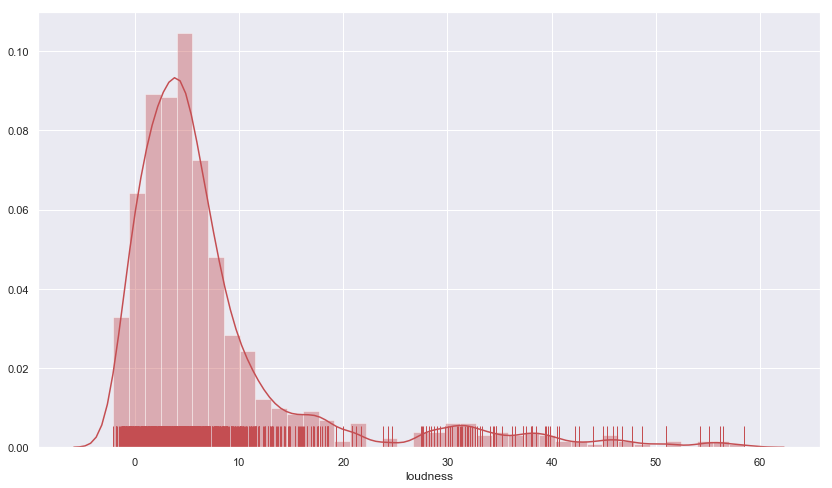

In [38]:
sns.distplot(analysis['loudness'], bins = 40, rug = True, color = 'r')

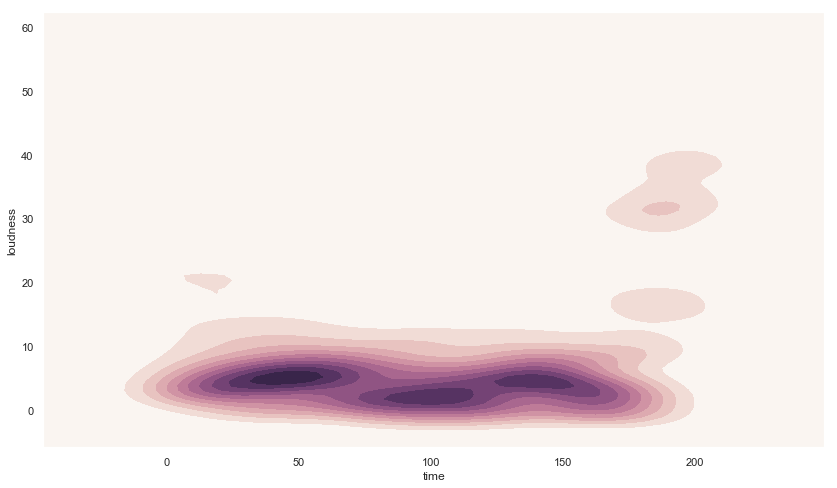

In [71]:
pal = sns.cubehelix_palette(light = 1, as_cmap=True)# plt.fig.set_size_inches(11,6)
sns.kdeplot(analysis['time'], analysis['loudness'], cmap = pal, shade = True)

## Visualizing Pitches

Attempting to show the dominance of different pitches throughout a song. The data is given to us in arrays for each segment. Each array has the pitch desity in the format [C, C#/Db, D, D#/Eb, E, F, F#/Gb, G, G#/Ab, A, A#/Bb, B]. Hence we will create a dataframe to correspond the pitch density to these values. 

In [26]:
analysis = sp.audio_analysis(tid3)
p_time = [x['start'] for x in analysis['segments']]
p_types = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']

# Creating columns for timestamps for each pitch (len(p_time) * 12) to create a stamp for each pitch
p_time_complete=[]
for x in range(len(p_types)):
    p_time_complete.extend(p_time)
    
    
# Creating columns for all the types
p_types_complete = [x for x in p_types for y in range(len(p_time))]


# Creating the colums for the pitch densities
count = 0
p_density = []
for x in range(12):
    for y in analysis['segments']:
        p_density.append(y['pitches'][count])
    count+=1

# Creating the dataframe
d = {'Density': p_density, 'Pitch': p_types_complete, 'Time': p_time_complete}
pitches = pd.DataFrame(data=d)

pitches.head()

,Density,Pitch,Time
0,0.614,C,0.00000
1,1.000,C,1.67755
2,0.712,C,2.00912
3,0.113,C,2.15773
4,0.245,C,2.84957


### Scatterplot

Looking at the distribution of pitches at each momnent of the song

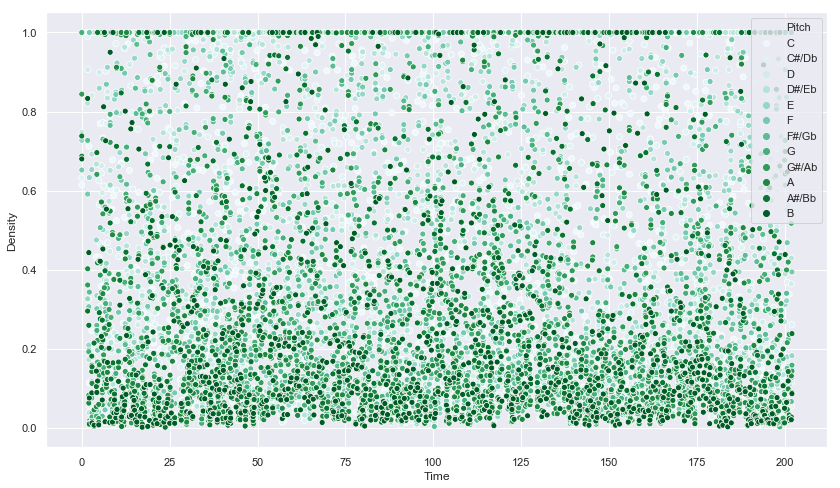

In [73]:
sns.scatterplot(x = 'Time', y = 'Density', data = pitches, hue = 'Pitch', palette = "BuGn")

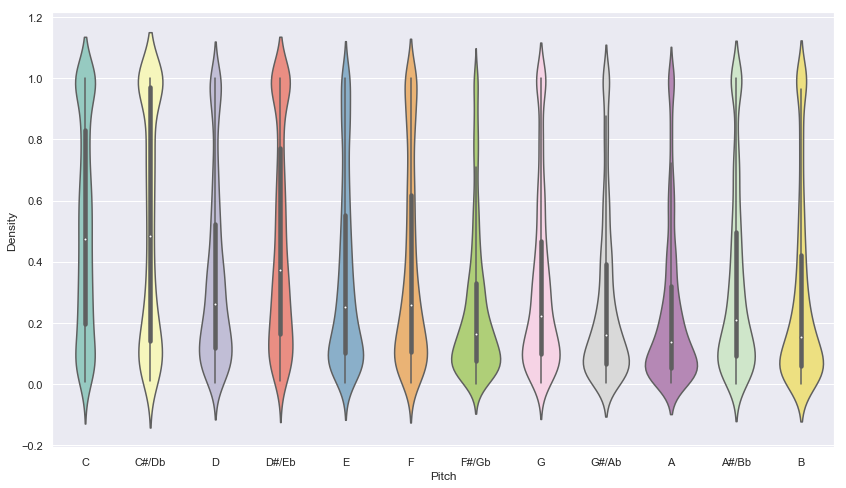

In [74]:
sns.violinplot(x = 'Pitch', y = 'Density', data = pitches, palette='Set3', bw = .2)

C
C#/Db
D
D#/Eb
E
F
F#/Gb
G
G#/Ab
A
A#/Bb
B


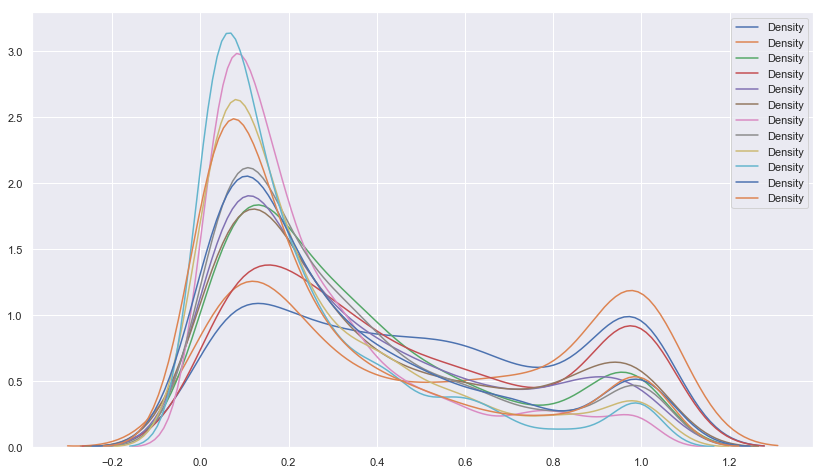

In [31]:
for x in p_types:
    sns.kdeplot(pitches[pitches["Pitch"]== x]['Density'])
    print(x)

In [556]:
c_den = pitches[pitches["Pitch"]== "C"]['Density']
